## 5. Koordinat Referans Sistemleri (CRS) ve Projeksiyonlar

Koordinat referans sistemleri, elimizdeki verinin iki boyutlu olarak (düzlem üzerinde) dünyadaki gerçek konumlarla nasıl ilintili olduğunu temsil eder. Öznitelikleri konumları ile bir tutan bir yapıştırıcı görevi görürü. GeoDataFrame dosyaları, .crs uzantılı öznitelikleri içerisinde barındırarak, veri setinin hangi koordinat referans sisteminde düzenlendiğini gösterir. Projeksiyona indirgenmiş koordinat sistemleri ise, verinin düz bir yüzey üzerinde nasıl çizdirileceğini betimler. Bu yüzey bir kağıt harita ya da bilgisayar ekranı olabilir. 


Bu koordinatları dönüştürmek ve projeksiyona indirgemek oldukça basittir. Farklı veri setlerinin aynı projeksiyona indirgenmesi için, aynı koordinat referans sistemlerinde düzenlenmiş olması gerekmektedir. Akti takdirde, konumsal analizlerde doğru sonuçları elde etmek olanaksızdır. Veri setleri içindeki tüm öznitelikler aynı koordinat referans sistemine sahip olmalıdır. 

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
# Ülkeler veri setini okuyalım
ulkeler = gpd.read_file('countries.shp')
ulkeler.head()

,NAME,POP_EST,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,CONTINENT,REGION_UN,SUBREGION,geometry
0,Indonesia,260580739,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,31381992,863000.0,2017,2010,2016,6. Developing region,3. Upper middle income,Asia,Asia,South-Eastern Asia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,17789267,436100.0,2017,2002,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,11138234,78350.0,2017,2001,2016,5. Emerging region: G20,4. Lower middle income,South America,Americas,South America,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,31036656,410400.0,2017,2007,2016,5. Emerging region: G20,3. Upper middle income,South America,Americas,South America,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [14]:
ulkeler.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
# ACLED çatışmalar veri setini okuyalım
catismalar = gpd.read_file("acled2019.shp", rows=500)
catismalar.head()

,data_id,iso,event_id_c,event_id_n,event_date,year,time_preci,event_type,sub_event_,actor1,...,latitude,longitude,geo_precis,source,source_sca,notes,fatalities,timestamp,iso3,geometry
0,6768128,887,YEM45982,45982,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.3541,47.0765,2,Yemen Data Project; Aden al Ghad; Al Janoob al...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",0,1580761030,YEM,POINT (47.07650 14.35410)
1,6768129,887,YEM45983,45983,31 December 2019,2019,1,Strategic developments,Change to group/activity,Military Forces of Yemen (2012-) Security Belt...,...,14.3541,47.0765,2,Al Janoob al Youm; Yemen Data Project,Local partner-National,"On 31 December 2019, forces loyal to the South...",0,1580761030,YEM,POINT (47.07650 14.35410)
2,6768130,887,YEM45984,45984,31 December 2019,2019,1,Battles,Armed clash,Military Forces of Yemen (2012-),...,14.2081,47.1570,1,Al Janoob al Youm; Aden al Ghad; Yemen Data Pr...,Local partner-National,"On 31 December 2019, clashes reportedly erupte...",1,1580761030,YEM,POINT (47.15700 14.20810)
3,6715395,356,IND68948,68948,31 December 2019,2019,1,Protests,Peaceful protest,Protesters (India),...,20.2724,85.8338,1,Pioneer (India),National,"On 31 December, students' wing of INC and Mili...",0,1578514389,IND,POINT (85.83380 20.27240)
4,6943236,222,SLV861,861,31 December 2019,2019,1,Violence against civilians,Attack,B-18: Barrio-18,...,13.5894,-89.2383,1,El Salvador.com,National,On 31th December 2019 in Huizucar (La Libertad...,1,1582839958,SLV,POINT (-89.23830 13.58940)


In [16]:
catismalar.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Farklı Koordinat Referans sistemleri (CRS), farklı ölçülere sahiptir. Bazılarında koordinat gösterimi, coğrafi koordinatlar ile sağlanırken, bazılarında ise kartezyen koordinatlar (metre cinsinden) kullanılmaktadır. 

Doğru projeksiyonun seçimi için https://spatialreference.org/ adresindeki katalog kullanılabilir. 

Verimizi Mercator projeksiyonuna indirgeyeceğiz. Mercator projeksiyonu (EPSG:3395), enlem-boylam dörtgenlerinin ekvatordan uzaklaştıkça x ve y ekseni doğrultusunda genişlediği bir projeksiyondur. 

In [17]:
# Geometry sütununu inceleyelim: Coğrafi koordinatların kullanıldığına dikkat edelim.
ulkeler.geometry[:5]

0    MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...
1    MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...
2    MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...
3    POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...
4    MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...
Name: geometry, dtype: geometry

Antartika kıtası, Mercator projeksiyonunda tamamen içe bükülerek gösterileceği için bu satırları dahil etmeyen yeni bir veri seti oluşturalım.

In [18]:
ulkeler = ulkeler[(ulkeler.NAME != "Antarctica") & (ulkeler.NAME != "Fr. S. Antarctic Lands")]

# Veriyi Mercator Projeksiyonuna taşıyalım. EPSG: 3395
ulkeler_projected = ulkeler.to_crs(epsg=3395)

# Ulkeler verisinin projekte edilmiş halinin geometri sütununu inceleyelim. 
ulkeler_projected['geometry'][:5]

0    MULTIPOLYGON (((13102705.696 460777.652, 13102...
1    MULTIPOLYGON (((13102705.696 460777.652, 13101...
2    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
3    POLYGON ((-7737827.685 -1967028.785, -7737828....
4    MULTIPOLYGON (((-7737827.685 -1967028.785, -77...
Name: geometry, dtype: geometry

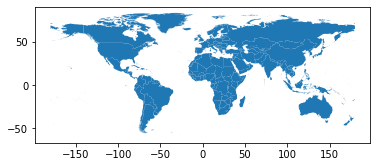

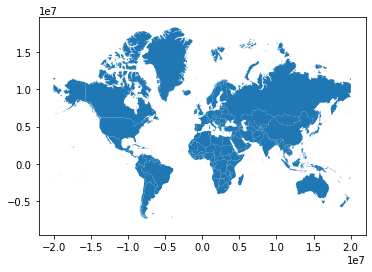

In [19]:
# Ülkeler verisinin Mercator projeksiyonuna indirgenmemiş ve indirgenmiş haritalarını çizdirelim.
ulkeler.plot();
ulkeler_projected.plot();

Çatışmalar veri setini, Merkator projeksiyonuna indirgenmiş ülkeler haritasının üzerine izdüşürelim. 

<AxesSubplot:>

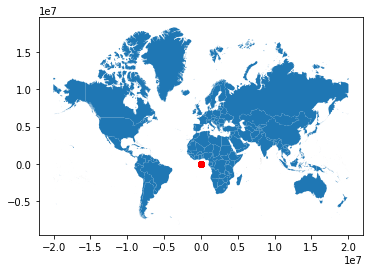

In [20]:
fig, ax = plt.subplots()
ulkeler_projected.plot(ax=ax)
catismalar.plot(ax=ax, color='red') 

Görüleceği üzere çatışma verisindeki lokasyonlar hala WGS84 projeksiyonunda kalmıştır. Bu işlemi Merkator projeksiyonuna indirgenmemiş ülkeler haritası ile yaptığımızda da, çatışmalar verisinin WGS84 şeklinde kaldığını görebilmekteyiz.

<AxesSubplot:>

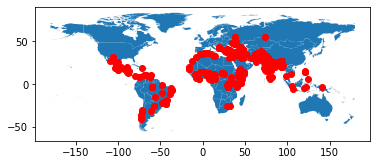

In [10]:
fig, ax = plt.subplots()
ulkeler.plot(ax=ax) # WGS84 olan ülkeler verisi
catismalar.plot(ax=ax, color='red') # WGS84 olan çatışmalar verisi

O halde, çatışmalar veri setini de WGS84 sisteminden Mercator Projeksiyonuna indirgememiz gerekir. İki veri setinin üst üste bindirme (overlay) işlemi yapılırken, iki verinin de aynı referans sisteminde olması önemlidir.

<AxesSubplot:>

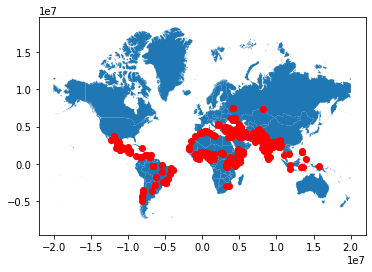

In [11]:
catismalar_projected = catismalar.to_crs(epsg=3395)
fig, ax = plt.subplots()
ulkeler_projected.plot(ax=ax)
catismalar_projected.plot(ax=ax, color='red')
